In [2]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
# load the dataset
app_data = pd.read_csv(r"C:\Users\ADMIN\Desktop\anroid_app.csv")
review_data = pd.read_csv(r"C:\Users\ADMIN\Desktop\android_app_user_reviews.csv")

In [4]:
#################### Data Cleaning ####################

In [5]:
# preview app_data

# check for duplicate
print('Number of duplicated rows: ',app_data.duplicated().sum())
# remove duplicate
app_data = app_data.drop_duplicates()

# data general info
print(app_data.info())
print(app_data.describe())

# first 5 columns
print(app_data.head())

# check for missing values
print('Number of missing values: ',app_data.isnull().sum())

# check for unique values
print('Unique values: ',app_data.nunique())


Number of duplicated rows:  483
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
            Rating
count  8893.000000
mean      4.189542
std       0.545452
min       1.000000
25%       4.000000
50%       4.

In [6]:
# we can see that 'Reviews', 'Installs', and 'Price' can be converted to numeric values 
# change data type of column 'Reviews' and 'Installs' and 'Price'
import re
def clean_and_convert(value):
    if isinstance(value, (int, float)):
        return value
    cleaned_value = re.sub(r'[^\d.]', '', str(value))  # Remove non-numeric characters
    try:
        return float(cleaned_value)
    except ValueError:
        return None

app_data['Reviews'] = app_data['Reviews'].apply(clean_and_convert)
app_data['Installs'] = app_data['Installs'].apply(clean_and_convert)
app_data['Price'] = app_data['Price'].apply(clean_and_convert)

In [7]:
# create column 'Revenue' = 'Price' * 'Installs'
app_data['Revenue'] = app_data['Price'] * app_data['Installs']

In [94]:
# preview the user reviews dataset
print('Duplication in the dataset: ', review_data.duplicated().sum())
review_data = review_data.drop_duplicates()

# data general info
print(review_data.info())
print(review_data.describe())

# first 5 columns
print(review_data.head())

# check for missing values
print('Number of missing values: ',review_data.isnull().sum())

# check for unique values
print('Unique values: ',review_data.nunique())

Duplication in the dataset:  33616
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30679 entries, 0 to 64236
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     30679 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29697 non-null  object 
 3   Sentiment_Polarity      29697 non-null  float64
 4   Sentiment_Subjectivity  29697 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB
None
       Sentiment_Polarity  Sentiment_Subjectivity
count        29697.000000            29697.000000
mean             0.188836                0.490848
std              0.355672                0.266029
min             -1.000000                0.000000
25%              0.000000                0.350000
50%              0.157143                0.514286
75%              0.422500                0.652500
max              1.000000    

In [ ]:
#join the 2 dataset
joined_data = pd.merge(app_data, review_data, on='App', how='inner')

In [99]:
# convert 'Translated_Review' to string and fill nan values
def transform_to_str(df, column_name, fill_value=''):
    df[column_name] = df[column_name].astype(str)
    df[column_name] = df[column_name].fillna(fill_value)

transform_to_str(joined_data, 'Translated_Review', fill_value='')

In [8]:
#################### Exploratory Data Analysis ####################

In [9]:
pivot1 = pd.pivot_table(app_data, 
                        values=['App'],
                        index=['Content Rating'],
                        columns=['Type'],
                        aggfunc=['count'],
                        fill_value=0)
pivot1.style.format('{:,.0f}')

In [10]:
pivot2 = pd.pivot_table(app_data, 
                        values=['Reviews', 'Installs','Revenue'], 
                        index=['Content Rating'],
                        columns=['Type'],
                        aggfunc=['sum'],
                        fill_value=0)
pivot2.style.format('{:,.0f}')

In [11]:

# At a quick glance, 'Everyone' and 'Teen' had the largest number of apps available -> leading to largest number of installs and reviews
# However the revenue created shows that 'Everyone' and 'Everyone 10+' contributed to most of the revenue
#  -> 'Everyone 10+' users tend to spend ALOT, with 32 paid app and almost equaled the revenue of 'Everyone'
#  -> 'Teen' had more apps but bring back little revenue
#  -> 'Adult only 18+' and 'Unrated' provided zero revenue and contributed a total of 5 apps -> I will neglect these 2 segments and focus on the remaining 4 segments for analysis


In [12]:
pivot3 = pd.pivot_table(app_data, 
                        values=['Rating'], 
                        index=['Content Rating'],
                        columns='Type',
                        aggfunc=[np.mean],
                        fill_value=0)
pivot3.style.format('{:,.2f}')

In [13]:
# Overall, the Rating of paid apps was higher than that of free apps
# 'Everyone' and 'Mature 17+' were having quite negative feedbacks on free type and we will deep dive into that

In [14]:
# Data Visualization 

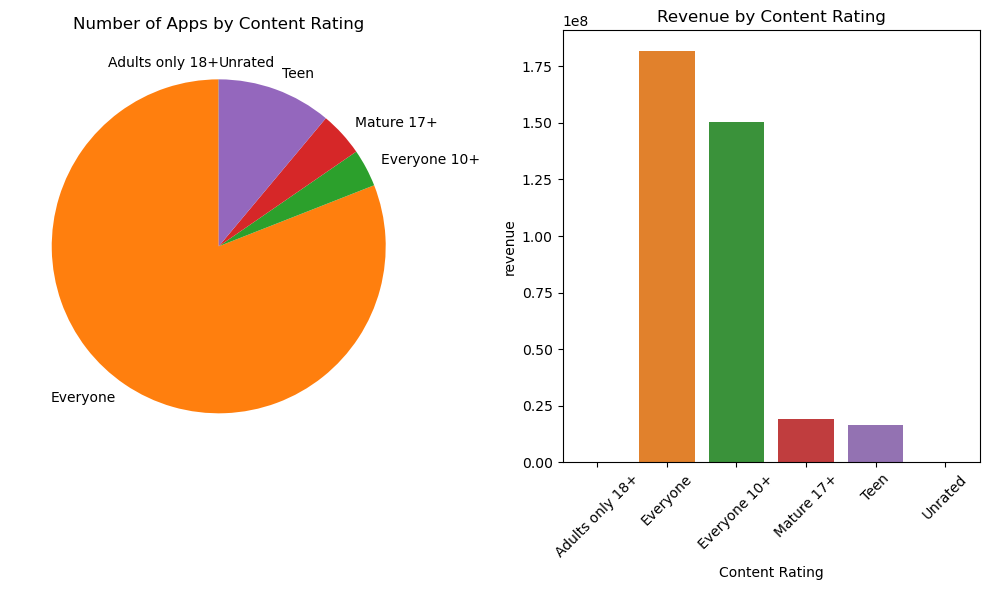

In [87]:
app_data_count = app_data.groupby('Content Rating')['App'].count().reset_index()
data_reve = app_data.groupby('Content Rating')['Revenue'].sum().rename('revenue').reset_index()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))

ax1.pie(app_data_count['App'], labels=app_data_count['Content Rating'], startangle=90, radius=1)
ax1.set_title('Number of Apps by Content Rating')

bar = sns.barplot(x="Content Rating", y="revenue", data=data_reve, ax=ax2)
bar.set_xticklabels(bar.get_xticklabels(), rotation=45)
bar.set_title('Revenue by Content Rating')

plt.tight_layout()

In [ ]:
# 'Everyone' and 'Everyone 10+' contributed to most of the revenue 
# 'Teen' had many apps but provide litle income -> need to identify the feature this segments desired to create more income

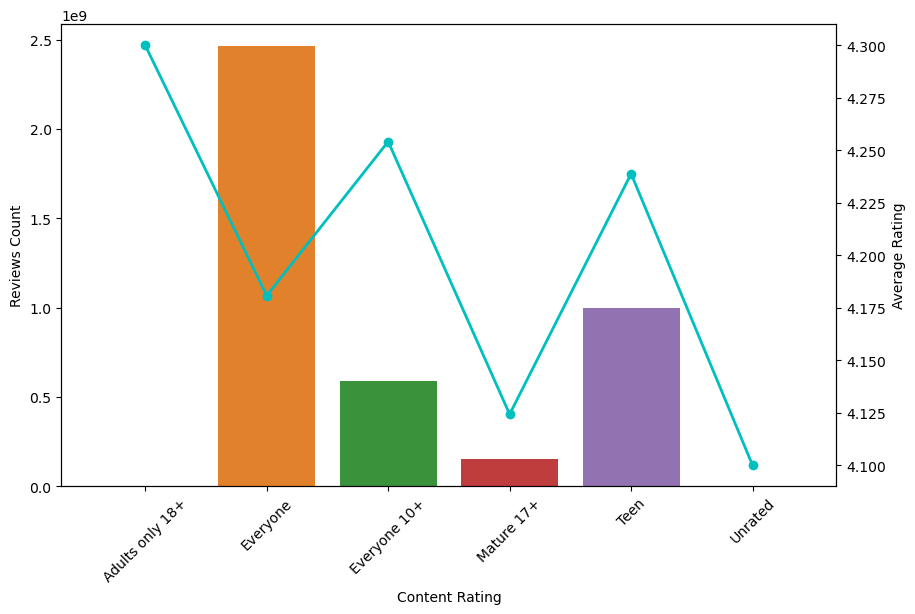

In [127]:
content_data_rev = app_data.groupby('Content Rating')['Reviews'].sum().rename('rev').reset_index()

content_data_rat = app_data.groupby('Content Rating')['Rating'].mean().rename('rat').reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

bar = sns.barplot(x="Content Rating", y="rev", data=content_data_rev)
bar.set_xticklabels(bar.get_xticklabels(), rotation=45)
bar.set_ylabel('Reviews Count')
ax2 = ax.twinx()

line = ax2.plot(content_data_rat["Content Rating"], content_data_rat["rat"], marker='o', color='c', linewidth=2)
ax2.set_xticklabels(content_data_rat["Content Rating"], rotation=45)
ax2.set_ylabel('Average Rating')

plt.show()

In [ ]:
# 'Everyone' and 'Mature 17+' had the lowest rating 
# although 'Everyone' had the most number of apps, it had a very low rating -> this segment had many feature that users dislike and were in need to be adjusted

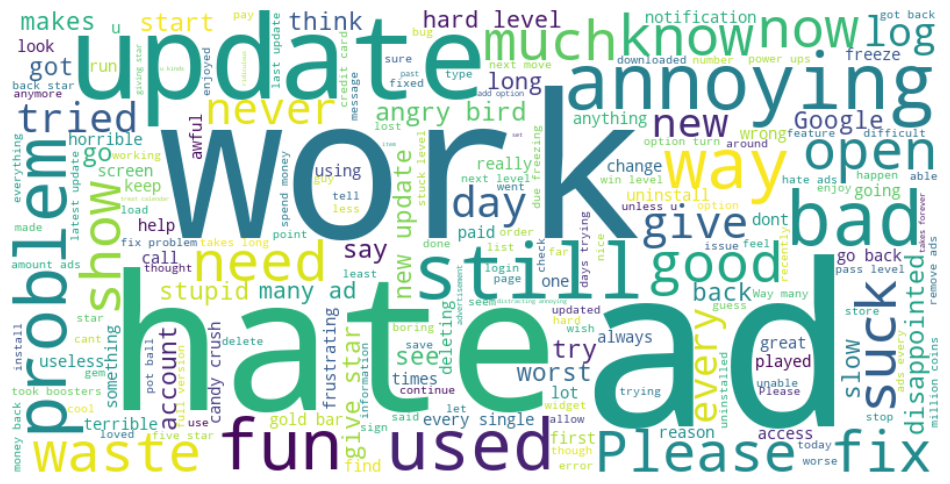

In [88]:
# tex analysis for 'Everyone'
# filter data by category
everyone_filter = joined_data[joined_data['Content Rating'] == 'Everyone']
everyone_filter = everyone_filter[everyone_filter['Sentiment'] == 'Negative'] #filter negative comments - these are the issues needed fixes

# create wordcloud to analyze review

from wordcloud import WordCloud
from wordcloud import STOPWORDS

text = ''.join(everyone_filter['Translated_Review'])

custom_stopwords = ["time", "even", "want", "app", "game","play","make","love","playing","thing","phone","people"] #remove unnecessary words
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(STOPWORDS).union(custom_stopwords)).generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# as shown in the wordcloud, we can see most of the problems that users reported are from bad updates and advertisements
# 1. bad update issues: unable to log in, broken when using, deleting data
# 2. advertisement issues: too many ads, ads too long and frustrating, need to spend moneyto remove ads
# to tackle these issues and present a better product to users, we need to 
# -> 1. tighten quality control when issuing a new update, increase testing for log-in feature, user data maintenance, and in-game functionality
# -> 2. divert ads to decrease the boredom of users, change to duration of ads depends on the frequency of apperance so that users can somtimes skip ads after a certain period 

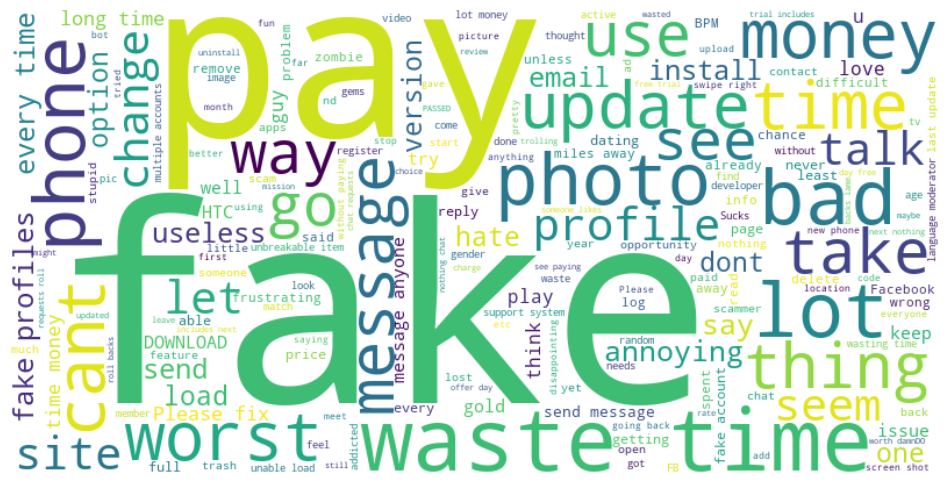

In [111]:
# tex analysis for 'Mature 17+'
mature_filter = joined_data[joined_data['Content Rating'] == 'Mature 17+']

mature_filter = mature_filter[mature_filter['Sentiment'] == 'Negative'] 

text2 = ''.join(mature_filter['Translated_Review'])
custom_stopwords2 =['people','really','want','game','app','even','game','know','need','great','good','make','work']
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(STOPWORDS).union(custom_stopwords2)).generate(text2)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [72]:
# this segment seemed to love the usage of online social platform and online dating apps, with reviews mostly about how they feel while using the app
# the biggest issue that this segment had are fake account/profile and fake photos
# -> deploy authorization step when a user create new account, with modern techniques such as facial recognition and identity check
# alot of features were limitted for free version and need to pay to use
# -> provide free trial for certain period for users to experience the pid version, diversify package so that users can decide to purchase what they want
# anoying message received from strangers
# -> limitted the availability to send message to other people (ex: only multually accepted account can send message to each other)

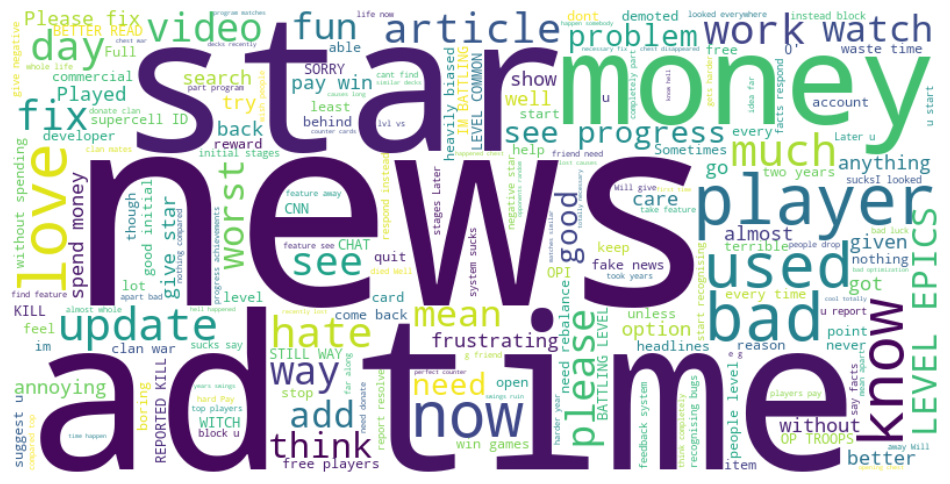

In [113]:
# Text analysis for 'Everyone 10+'
e10_filter = joined_data[joined_data['Content Rating'] == 'Everyone 10+']
e10_filter = e10_filter[e10_filter['Sentiment'] == 'Negative'] 

text3 = ''.join(e10_filter['Translated_Review'])
custom_stopwords3 =['game','even','want','new','really','make','app','great','always','thing','play','playing']
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(STOPWORDS).union(custom_stopwords3)).generate(text3)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# most of this segment reviews were for games, which in the ages of 10+ played alot. There were also apps for updating news that gathered quite a number of negative feedback
# 1. Ads took alot of time while playing the game
# -> same with 'Everyone's problem
# 2. Users could only make litle progress if they didn't spend money in the game, players who pay are the ones who win
# -> need to balance the game strategy so that paid users wouldn't abuse free users too much, paid package should be more about users experience rather than gaming progress
# 3. The rewards for watching ads were small
# -> adjust the duration of ads equivalant to rewards, shortern the ads for small reward
# 4. update patch receive crashes 
# -> same with 'Everyone's problem
# 5. NEWS are biased and fake
# -> diverify news sources, collect news from trustworthy publishers

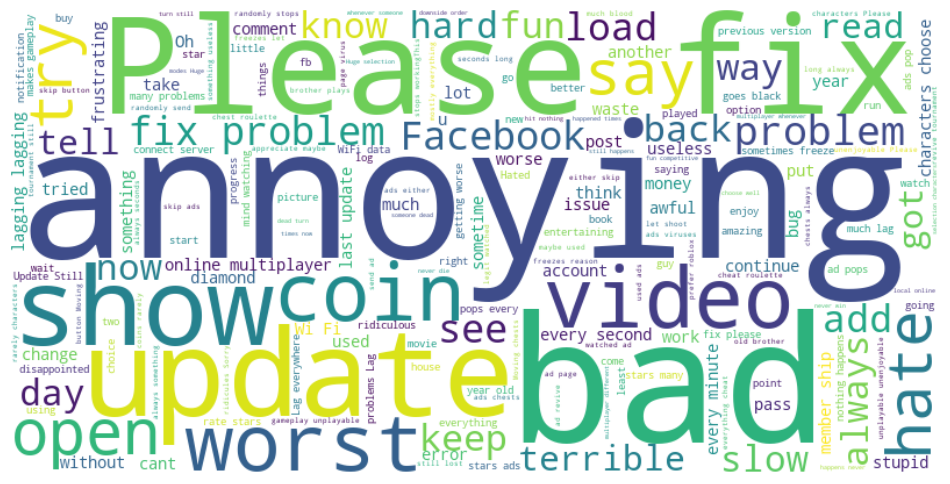

In [123]:
# Text analysis for 'Teen'
teen_filter = joined_data[joined_data['Content Rating'] == 'Teen']
teen_filter = teen_filter[teen_filter['Sentiment'] == 'Negative'] 

text4 = ''.join(teen_filter['Translated_Review'])
custom_stopwords4 =['really','even','want','time','people','give','player','playing','game','app','need','great','play','thing','phone','good','make','love']
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(STOPWORDS).union(custom_stopwords4)).generate(text4)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# most of the negative feedback are for game, as users in this group tended to playing game more
# the negative feedbacks were focusing on the gaming fuctionality as the new update made the game slow, lag, randomly stop, and is considered a terrible update
# there are also connection issue with the wifi as well as log-in issue
# -> same solution as 'Everyone' issue

### 'Teen' were not received negative comment on ads and monetization, so there were room to create income out of this segment. And applying the above method for ads and in-game purchasing, the revenue created by thi segment will improve